## Exercise Set 5 

# Jake Muff

# Question 1: Fisher DIscriminant 

Part 1. Plotting the data points from the two samples in the x_1 x_2 plane

Text(0, 0.5, 'x_2')

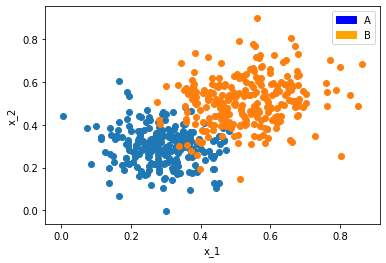

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


A = np.loadtxt('DatasetA.txt')
B = np.loadtxt('DatasetB.txt')


A_1 = np.loadtxt("DatasetA.txt")[:,0 ] #first column of data set A 
A_2 = np.loadtxt("DatasetA.txt")[:,1 ] #second column of data set A
B_1 = np.loadtxt("DatasetB.txt")[:,0 ] #first column of data set B
B_2 = np.loadtxt("DatasetB.txt")[:,1 ] #second column of data set B 
plt.scatter(A_1, A_2)
plt.scatter(B_1, B_2)
blue_patch = mpatches.Patch(color='blue', label='A')
orange_patch = mpatches.Patch(color='orange', label='B')
plt.legend(handles=[blue_patch, orange_patch])
plt.xlabel('x_1')
plt.ylabel('x_2')





Part 2. Calculating vector c. For this is used a numpy algortihm to calculate the inverse. I also assumed by expectation values the question meant average or mean values. The question was then simply following the equation given. 

Vector c:
[[-10.28518883]
 [ -8.83421184]]


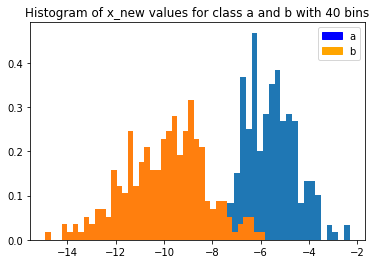

In [202]:
V_a = np.cov(A_1, A_2)
V_b = np.cov(B_1, B_2)
#print((V_a + V_b))
V = np.linalg.inv(V_a+V_b)


mu_a1 = np.mean(A_1)
mu_a2 = np.mean(A_2)
mu_b1 = np.mean(B_1)
mu_b2 = np.mean(B_2)
mu_a = np.array([[mu_a1], [mu_a2]])
mu_b = np.array([[mu_b1], [mu_b2]])
#print(mu_a- mu_b)


y= (mu_a - mu_b) 
c=np.matmul(V,y)

x_newa = c[0] * A_1 + c[1] * A_2
x_newb = c[0] * B_1 + c[1] * B_2
counta, binsa, ignored = plt.hist(x_newa, 40, density=True)
countb, binsb, ignored = plt.hist(x_newb, 40, density=True)
blue_patch = mpatches.Patch(color='blue', label='a')
orange_patch = mpatches.Patch(color='orange', label='b')
plt.legend(handles=[blue_patch, orange_patch])
plt.title('Histogram of x_new values for class a and b with 40 bins')
print('Vector c:')
print(c)

Part 3. This was the hardest part. To calculate the 96% rejection I simply parsed the x_new for class b into a new array for which normalized values were greater than or equal to 0.96. I also found another way using interp1d which gave roughly the same value, however it did spit out an error. 

I believe the result could be improved by changing the way my bin widths were calculated. The plots were shown below with both rejection lines calculated and the cdf's plotted with them. The cdfs plotted were also not connected as I thought they should be. 

-9.7129166747385
0.004
-12.86338950288135
0.06399999999999981
-9.731877714303526
250 40
      converged: True
           flag: 'converged'
 function_calls: 2
     iterations: 1
           root: -10.154080307521845


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/zeros.py:343: RuntimeWarning: Tolerance of 4.560077054074419 reached.
  warnings.warn(msg, RuntimeWarning)


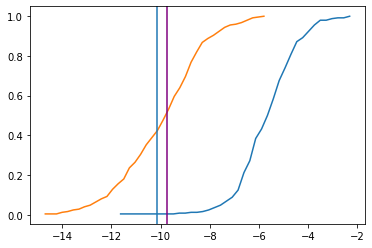

In [214]:
from scipy.interpolate import interp1d
from scipy import optimize



#print(len(x_newb))
dx_a = binsa[1]-binsa[0] #from 0 to 1
dx_b = binsb[1] - binsb[0]

F1 = np.cumsum(counta*dx_a)
F2 = np.cumsum(countb * dx_b)

plt.plot(binsa[1:], F1)
plt.plot(binsb[1:], F2)

print(binsa[9])
print(F1[9])
print(binsb[9])
print(F2[9])

for x in range(250):
    if((x/250)>= 0.96):
        x_new_g = x_newb[x]

print(x_new_g)
plt.axvline(x_new_g, color='purple')

bins_b = 40

bin_widths_b = np.histogram_bin_edges(countb, binsb[1:])
 #b y axis for hist above
print(len(x_newb), len(bin_widths_b))
cdf_b = scipy.interpolate.interp1d(countb, np.cumsum(bins_b * bin_widths_b), bounds_error=False, fill_value=(0, 1))



sol = scipy.optimize.root_scalar(
    lambda x: cdf_b(x) - 0.96,
    x0=(x_newb.mean() + x_newb.min()) / 2,
    x1=(x_newb.mean() + x_newb.max()) / 2)
print(sol)
plt.axvline(sol.root)